In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *
#----------------------------------
# Read data
#----------------------------------

In [2]:
RV_FT_k     = np.loadtxt('../lib/FIESTA_daily_output/RV_FT_k.txt')
eRV_FT_k    = np.loadtxt('../lib/FIESTA_daily_output/eRV_FT_k.txt')
ΔRV_k       = np.loadtxt('../lib/FIESTA_daily_output/ΔRV_k.txt')
bjd_daily   = np.loadtxt('../lib/FIESTA_daily_output/bjd_daily.txt')
rv_daily    = np.loadtxt('../lib/FIESTA_daily_output/rv_daily.txt')
σrv_daily   = np.loadtxt('../lib/FIESTA_daily_output/σrv_daily.txt')

In [7]:
from scipy import optimize

X = ΔRV_k.T
Y = rv_daily - np.mean(rv_daily) 

rms = 0.24552382686943414


Text(0, 0.5, '$\\beta_k$')

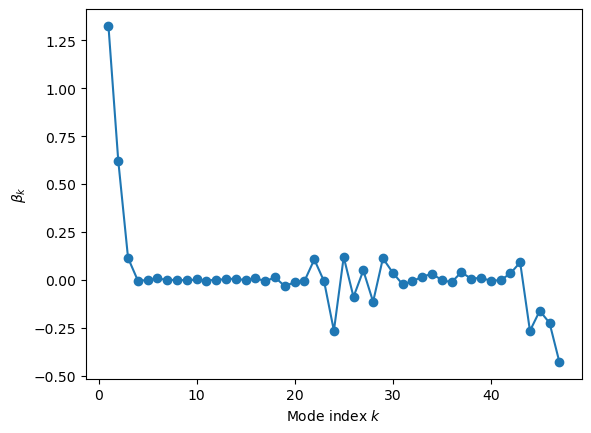

In [8]:
def loss(params):
    diff = np.sum(params[:47]*X, axis=1) + params[47] - Y
    _, wrms = weighted_avg_and_std(diff, 1/σrv_daily**2)
    return wrms
    
initial_guess = np.zeros(48)
result = optimize.minimize(loss, initial_guess)
if result.success:
    fitted_params = result.x
    print('rms =', loss(fitted_params))
else:
    raise ValueError(result.message)    

plt.plot(np.arange(47)+1, fitted_params[:47], 'o-')     
plt.xlabel('Mode index $k$')
plt.ylabel(r'$\beta_k$')

In [158]:
N =1
t = bjd_daily - min(bjd_daily)
amp = np.logspace(np.log10(0.5), 1, N)
amp_pred = np.zeros(N)
w_array = np.zeros((N, 47))
rms_array = np.zeros(N)
phase_array = np.zeros(N)
t_array = np.zeros(N)
initial_guess = np.ones(51)

def wmse(y1, y2, w):
    wmse = np.sum(w*(y1-y2)**2)/np.sum(w)
    return wmse

def model(params):
    y = np.sum(params[:47]*X, axis=1) + params[47] + 10**params[48]*np.sin(10**params[50]*t + params[49]) 
    return y

if 0:
    def model(params):
        y = np.sum(params[:47]*X, axis=1) + params[47] + 10**params[48]*np.sin(t + params[49]) 
        return y

def loss(params):
    return wmse(model(params), y, 1/σrv_daily**2)

for i in range(N):
    y = Y + amp[i] *np.sin(1*t+0.3)
    
    %time sol = opt.dual_annealing(loss, bounds=[[-1,1.5] for i in np.arange(48)] + [[-1.1,1.1], [0, np.pi], [np.log10(1/1.5), np.log10(1*1.5)]],  maxiter=10000)
    
    fitted_params = sol.x

    w_array[i] = fitted_params[:47]
    amp_pred[i] = 10**fitted_params[48]
    phase_array[i] = fitted_params[49]
    t_array[i] = 10**fitted_params[50]
    rms_array[i] = loss(fitted_params)**0.5
    
print('amp', amp)
print('amp_pred', amp_pred)
print('t_array', t_array)
print('phase_array', phase_array)
print('rms_array', rms_array)

CPU times: user 4min 15s, sys: 1.2 s, total: 4min 16s
Wall time: 4min 18s
amp [0.5]
amp_pred [0.5050481]
t_array [1.00087023]
phase_array [0.21360691]
rms_array [0.24273458]


In [162]:
N =10
t = bjd_daily - min(bjd_daily)
amp = np.logspace(-1, 1, N)
amp_pred = np.zeros(N)
w_array = np.zeros((N, 47))
rms_array = np.zeros(N)
phase_array = np.zeros(N)
t_array = np.zeros(N)
initial_guess = np.ones(51)

def wmse(y1, y2, w):
    wmse = np.sum(w*(y1-y2)**2)/np.sum(w)
    return wmse

def model(params):
    y = np.sum(params[:47]*X, axis=1) + params[47] + 10**params[48]*np.sin(10**params[50]*t + params[49]) 
    return y

if 0:
    def model(params):
        y = np.sum(params[:47]*X, axis=1) + params[47] + 10**params[48]*np.sin(t + params[49]) 
        return y

def loss(params):
    return wmse(model(params), y, 1/σrv_daily**2)

for i in range(N):
    y = Y + amp[i] *np.sin(1*t+0.3)
    
    %time sol = opt.dual_annealing(loss, bounds=[[-1,1.5] for i in np.arange(48)] + [[-1.1,1.1], [0, np.pi], [np.log10(1/1.5), np.log10(1*1.5)]],  maxiter=10000)
    
    fitted_params = sol.x

    w_array[i] = fitted_params[:47]
    amp_pred[i] = 10**fitted_params[48]
    phase_array[i] = fitted_params[49]
    t_array[i] = 10**fitted_params[50]
    rms_array[i] = loss(fitted_params)**0.5
    
print('amp', amp)
print('amp_pred', amp_pred)
print('t_array', t_array)
print('phase_array', phase_array)
print('rms_array', rms_array)

CPU times: user 4min 9s, sys: 1.31 s, total: 4min 10s
Wall time: 4min 13s
CPU times: user 4min 11s, sys: 394 ms, total: 4min 12s
Wall time: 4min 14s
CPU times: user 4min 12s, sys: 194 ms, total: 4min 12s
Wall time: 4min 14s
CPU times: user 4min 21s, sys: 1.91 s, total: 4min 23s
Wall time: 4min 26s
CPU times: user 4min 18s, sys: 1.75 s, total: 4min 20s
Wall time: 4min 23s
CPU times: user 4min 21s, sys: 1.66 s, total: 4min 23s
Wall time: 4min 26s
CPU times: user 4min 5s, sys: 1.39 s, total: 4min 6s
Wall time: 4min 10s
CPU times: user 4min 27s, sys: 153 ms, total: 4min 27s
Wall time: 4min 29s
CPU times: user 4min 16s, sys: 1.85 s, total: 4min 18s
Wall time: 4min 21s
CPU times: user 4min 14s, sys: 1.6 s, total: 4min 16s
Wall time: 4min 19s
amp [ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]
amp_pred [ 0.11205693  0.07943282  0.28623034  0.4705255   0.77609956  1.28781225
  2.16135079  3.60243098  5.99583735 10.00778

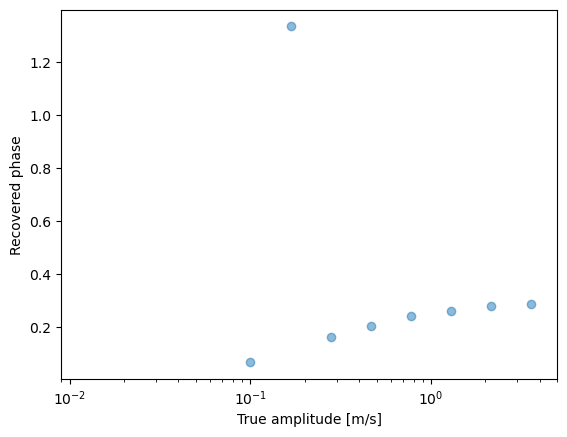

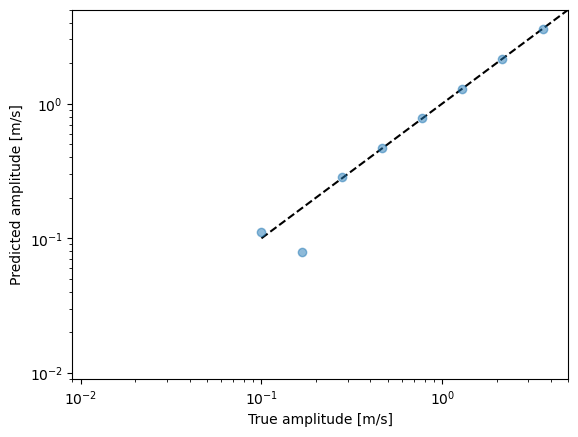

In [164]:
plt.plot(amp, phase_array, 'o', alpha=0.5)
plt.xscale('log')
plt.xlim([0.009, 5])
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Recovered phase')
plt.show()


plt.plot(amp, amp, 'k--')
plt.plot(amp, amp_pred, 'o', alpha=0.5)
plt.xlabel('True amplitude [m/s]')
plt.ylabel('Predicted amplitude [m/s]')
plt.xlim([0.009, 5])
plt.ylim([0.009, 5])
plt.xscale('log')
plt.yscale('log')

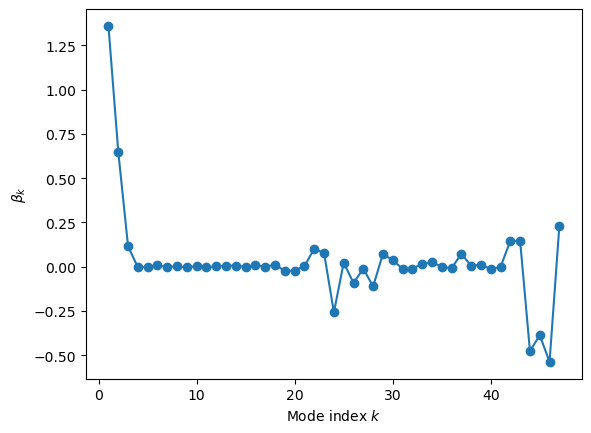

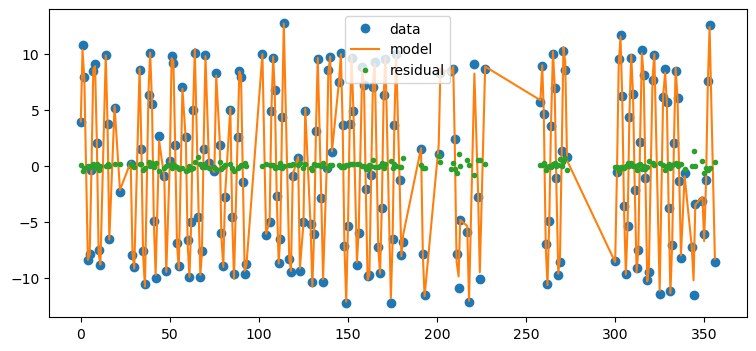

In [163]:
plt.plot(np.arange(47)+1, fitted_params[:47], 'o-')     
plt.xlabel('Mode index $k$')
plt.ylabel(r'$\beta_k$')

fig = plt.figure(figsize=(9, 4))
plt.plot(t, y, 'o', label='data')
plt.plot(t, model(sol.x), label='model')
plt.plot(t, model(sol.x) - y, '.', label='residual')
plt.legend()

### Simplified optimisation 

CPU times: user 348 ms, sys: 5.05 ms, total: 353 ms
Wall time: 352 ms
[-0.30103001  0.95424249  1.00000209]


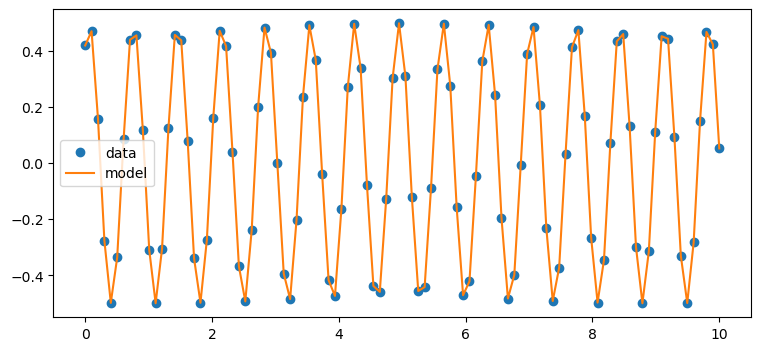

In [117]:
x_data = np.linspace(0,10,100)
y_data = 0.5*np.sin(x_data*9+1)

def model(params):
    y = 10**params[0]*np.sin(10**params[1]*x_data+params[2]) 
    return y

def loss(params):    
    diff = model(params) - y_data
    return np.sum(diff**2)

# initial_guess = np.ones(3)*1
# result = optimize.minimize(loss, initial_guess, method='L-BFGS-B')
# result.x

import scipy.optimize as opt
%time sol = opt.dual_annealing(loss, bounds=[[-1,1] for i in np.arange(2)] + [[0, np.pi]] )
print(sol.x)

fig = plt.figure(figsize=(9, 4))
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, model(sol.x), label='model')
plt.legend()